In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

In [4]:
df1 = pd.read_csv('PSO Historical Data (2).csv')
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 25, 2022",176.50,176.00,177.20,173.72,558.04K,0.85%
1,"Feb 24, 2022",175.01,179.00,179.00,172.00,902.62K,-2.56%
2,"Feb 23, 2022",179.60,182.45,182.45,179.20,566.24K,-0.76%
3,"Feb 22, 2022",180.98,182.32,182.37,179.50,678.19K,-1.24%
4,"Feb 21, 2022",183.25,183.00,185.19,182.93,819.53K,-0.01%
...,...,...,...,...,...,...,...
4916,"Feb 01, 2002",35.67,33.44,35.67,33.26,42.88M,7.47%
4917,"Jan 31, 2002",33.19,33.26,33.34,32.39,24.95M,0.24%
4918,"Jan 30, 2002",33.11,32.73,33.49,32.55,35.28M,3.34%
4919,"Jan 29, 2002",32.04,31.02,32.35,30.67,49.73M,3.99%


In [9]:
date = np.array(df1['Date'])
price = np.array(df1['Price'])
date = date[::-1] 
price = price[::-1]
date = np.reshape(date,(4921,1))
price = np.reshape(price,(4921,1))
d = np.hstack((date,price))
df= pd.DataFrame(d,columns=['Date','Price'])

In [40]:
df.tail(20)

,Price
Date,
2022-01-31,188.0
2022-02-01,188.11
2022-02-02,191.5
2022-02-03,190.11
2022-02-04,195.23
2022-02-07,194.45
2022-02-08,193.9
2022-02-09,195.5
2022-02-10,197.5


In [12]:
df.Date = pd.to_datetime(df.Date)

In [15]:
df = df.set_index('Date')


In [671]:
stamp = pd.DataFrame(df.Price.values)
df2 = pd.concat([stamp.shift(4),stamp.shift(3),stamp.shift(2),stamp.shift(1),stamp.shift(1).rolling(4).mean(),stamp],axis=1)
df2.columns = ['t-3','t-2','t-1','t','mean','t+1']

In [672]:
df3 = df2[4:].reset_index(drop=True)

In [673]:
df3

,t-3,t-2,t-1,t,mean,t+1
0,30.81,32.04,33.11,33.19,32.2875,35.67
1,32.04,33.11,33.19,35.67,33.5025,37.3
2,33.11,33.19,35.67,37.3,34.8175,36.52
3,33.19,35.67,37.3,36.52,35.6700,39.24
4,35.67,37.3,36.52,39.24,37.1825,42.18
...,...,...,...,...,...,...
4912,183.7,182.19,180.5,183.26,182.4125,183.25
4913,182.19,180.5,183.26,183.25,182.3000,180.98
4914,180.5,183.26,183.25,180.98,181.9975,179.6
4915,183.26,183.25,180.98,179.6,181.7725,175.01


In [675]:
y = df3['t+1']
y = y.to_numpy()
y = y.reshape((4917,1))

In [676]:
x = df3.drop(['t'],axis=1)
x = x.to_numpy()

In [677]:
x_train=x[:4500]
y_train=y[:4500]

In [678]:

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [679]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_train = x_train.tolist()
y_train = y_train.tolist()


In [680]:
x_test=x[4500:4900]
y_test=y[4500:4900]
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))
x_test = x_test.tolist()
y_test = y_test.tolist()

In [681]:
history = model.fit(x_train,y_train,epochs=50,batch_size=5)

Epoch 1/50
900/900 [==============================] - 3s 2ms/step - loss: 311.6877
Epoch 2/50
900/900 [==============================] - 2s 2ms/step - loss: 2.7410
Epoch 3/50
900/900 [==============================] - 2s 3ms/step - loss: 2.7460
Epoch 4/50
900/900 [==============================] - 2s 2ms/step - loss: 3.2163
Epoch 5/50
900/900 [==============================] - 2s 2ms/step - loss: 3.2284
Epoch 6/50
900/900 [==============================] - 2s 2ms/step - loss: 7.0800
Epoch 7/50
900/900 [==============================] - 2s 2ms/step - loss: 6.0874
Epoch 8/50
900/900 [==============================] - 2s 2ms/step - loss: 2.6343
Epoch 9/50
900/900 [==============================] - 2s 2ms/step - loss: 4.3458
Epoch 10/50
900/900 [==============================] - 2s 2ms/step - loss: 2.0925
Epoch 11/50
900/900 [==============================] - 2s 2ms/step - loss: 2.1203
Epoch 12/50
900/900 [==============================] - 2s 2ms/step - loss: 2.2016
Epoch 13/50
900/900 [==

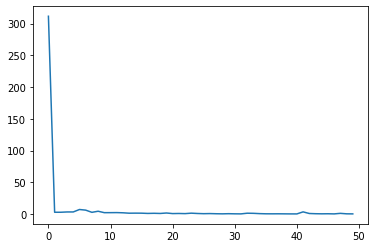

In [682]:
plt.plot(history.history['loss'])

In [683]:
model.evaluate(x_test,y_test,batch_size=5)

80/80 [==============================] - 0s 1ms/step - loss: 0.0818


0.08184774219989777

In [652]:
xint = np.array([183.25,180.98,179.6,175.01,179.7100])
xint = xint.reshape((1,5,1))

In [653]:
prediction = model.predict(xint)
prediction

array([[178.7664]], dtype=float32)